In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage import data
from skimage.filters import unsharp_mask
import matplotlib.pyplot as plt
import math
from my import cv2_imshow

DAMA_JPG = 'img/Dama.jpg'
MOON_JPG = 'img/moon.jpg'
LENA1_JPG = 'img/lena1.jpg'
CHEST_TIF = 'img/orig_chest_xray.tif'

## Average_image1_blur1

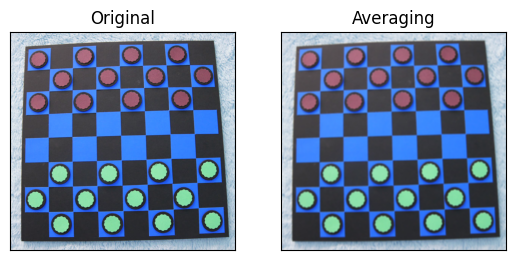

In [7]:

img = cv2.imread(DAMA_JPG, 1)


kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img, -1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

## Average_image3_denoising0

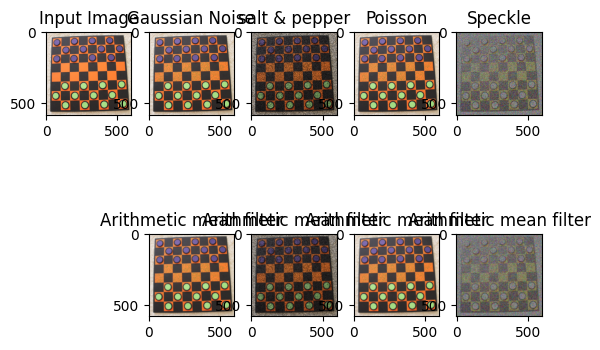

In [8]:
def noisy(noise_typ,image):
   if noise_typ == "gauss":
      row,col,ch= image.shape
      mean = 0
      var = 1
      sigma = var**0.5
      gauss = np.random.normal(mean,sigma,(row,col,ch))
      gauss = gauss.reshape(row,col,ch)
      noisy = image + gauss
      return noisy
   elif noise_typ == "s&p":
      out = np.copy(image)
      probs = np.random.random(image.shape[:2])
      out[probs < 0.2] = 1
      out[probs > 0.8] = 0
      return out
      #row,col,ch = image.shape
      #s_vs_p = 0.5
      #amount = 0.2
      #out = np.copy(image)
      ## Salt mode
      #num_salt = np.ceil(amount * image.size * s_vs_p)
      #coords = [np.random.randint(0, i - 1, int(num_salt))
      #        for i in image.shape]
      #out[coords] = 1
      ## Pepper mode
      #num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
      #coords = [np.random.randint(0, i - 1, int(num_pepper))
      #        for i in image.shape]
      #out[coords] = 0
      #return out
   elif noise_typ == "poisson":
      vals = len(np.unique(image))
      vals = 2 ** np.ceil(np.log2(vals))
      noisy = np.random.poisson(image * vals) / float(vals)
      return noisy
   elif noise_typ =="speckle":
      row,col,ch = image.shape
      gauss = np.random.randn(row,col,ch)
      gauss = gauss.reshape(row,col,ch)
      noisy = image + image * gauss
      return noisy

img = cv2.imread(DAMA_JPG, 1)
#img = img/255

dst1 = noisy("gauss",img)
dst2 = noisy("s&p",img)
dst3 = noisy("poisson",img)
dst4 = noisy("speckle",img)


b,g,r = cv2.split(img)           # get b,g,r
img1 = cv2.merge([r,g,b])
b,g,r = cv2.split(dst1)           # get b,g,r
rgb_img1 = cv2.merge([r,g,b])     # switch it to rgb
b,g,r = cv2.split(dst2)           # get b,g,r
rgb_img2 = cv2.merge([r,g,b])
b,g,r = cv2.split(dst3)           # get b,g,r
rgb_img3 = cv2.merge([r,g,b])
b,g,r = cv2.split(dst4)           # get b,g,r
rgb_img4 = cv2.merge([r,g,b])

rgb_img1 = np.uint8(rgb_img1)
rgb_img2 = np.uint8(rgb_img2)
rgb_img3 = np.uint8(rgb_img3)
rgb_img4 = np.uint8(rgb_img4)

kernel = np.ones((5,5),np.float32)/25
denois1 = cv2.filter2D(rgb_img1, -1,kernel)
denois2 = cv2.filter2D(rgb_img2, -1,kernel)
denois3 = cv2.filter2D(rgb_img3, -1,kernel)
denois4 = cv2.filter2D(rgb_img4, -1,kernel)


# denois1 = cv2.GaussianBlur(rgb_img1,(5,5),0)
# denois2 = cv2.GaussianBlur(rgb_img2,(5,5),0)
# denois3 = cv2.GaussianBlur(rgb_img3,(5,5),0)
# denois4 = cv2.GaussianBlur(rgb_img4,(5,5),0)


plt.subplot(251),plt.imshow(img1),plt.title('Input Image')
plt.subplot(252),plt.imshow(rgb_img1),plt.title('Gaussian Noise')
plt.subplot(253),plt.imshow(rgb_img2),plt.title('salt & pepper')
plt.subplot(254),plt.imshow(rgb_img3),plt.title('Poisson')
plt.subplot(255),plt.imshow(rgb_img4),plt.title('Speckle')

plt.subplot(257),plt.imshow(denois1),plt.title('Arithmetic mean filter')
plt.subplot(258),plt.imshow(denois2),plt.title('Arithmetic mean filter')
plt.subplot(259),plt.imshow(denois3),plt.title('Arithmetic mean filter')
plt.subplot(2,5,10),plt.imshow(denois4),plt.title('Arithmetic mean filter')

plt.show()

## high_boost_filtering_spatial

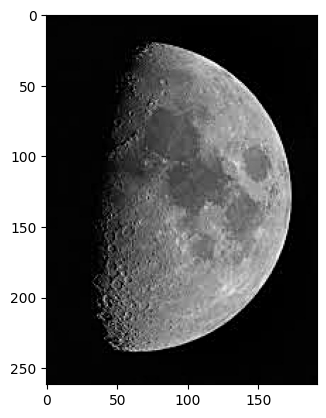

In [9]:

# Load the image
image=cv2.imread(MOON_JPG,0)
# Blur the image
gauss = cv2.GaussianBlur(image, (7,7), 0)
# Apply Unsharp masking
unsharp_image = cv2.addWeighted(image, 2, gauss, -1, 0)

plt.imshow(unsharp_image,cmap="gray")
plt.show()

## high_boost_filtering_spatial2

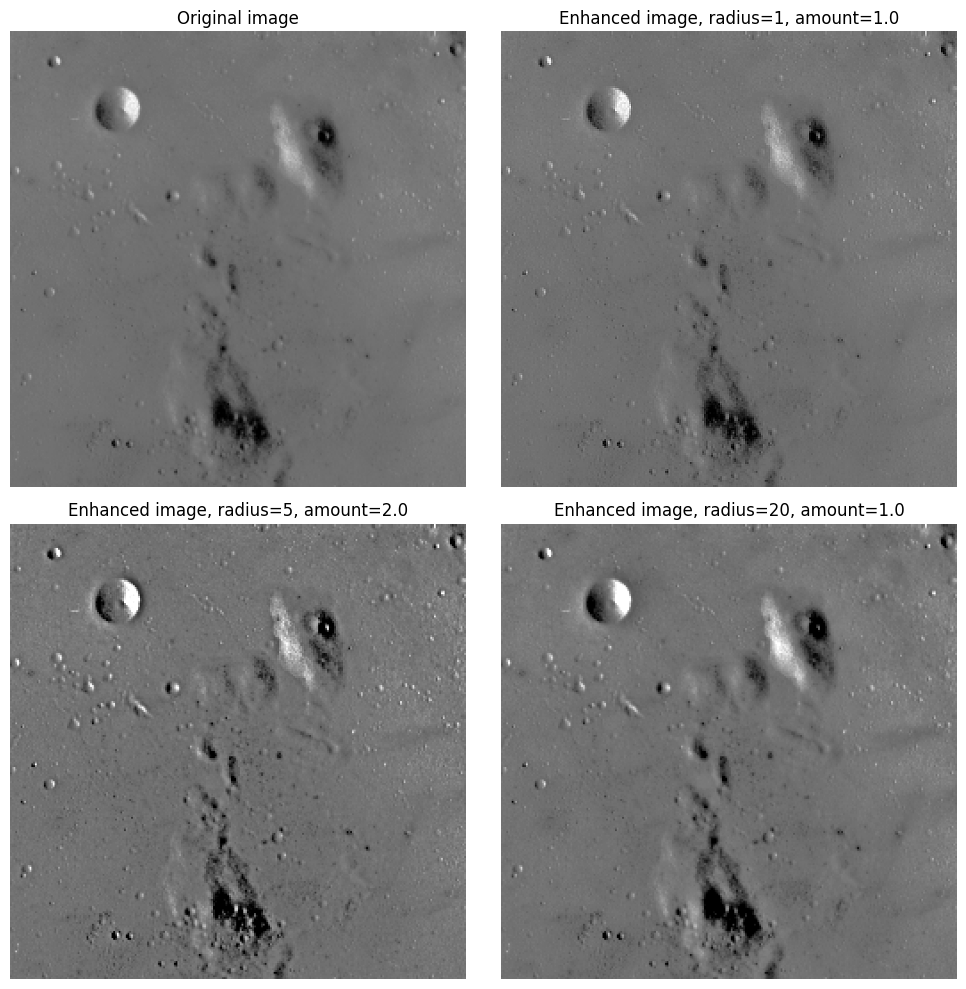

In [10]:

image = data.moon()
result_1 = unsharp_mask(image, radius=1, amount=1)
result_2 = unsharp_mask(image, radius=5, amount=2)
result_3 = unsharp_mask(image, radius=20, amount=1)

fig, axes = plt.subplots(nrows=2, ncols=2,
                         sharex=True, sharey=True, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original image')
ax[1].imshow(result_1, cmap=plt.cm.gray)
ax[1].set_title('Enhanced image, radius=1, amount=1.0')
ax[2].imshow(result_2, cmap=plt.cm.gray)
ax[2].set_title('Enhanced image, radius=5, amount=2.0')
ax[3].imshow(result_3, cmap=plt.cm.gray)
ax[3].set_title('Enhanced image, radius=20, amount=1.0')

for a in ax:
    a.axis('off')
fig.tight_layout()
plt.show()

## high_freq_emphasis_filter

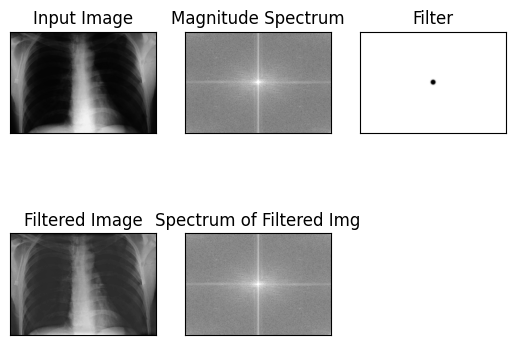

In [11]:
img = cv2.imread(CHEST_TIF, 0)
#img = cv2.imread(MOON_JPG, 0)
# create a mask
row, col = img.shape

I = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
I_shift = np.fft.fftshift(I)

magnitude_spectrum = 20*np.log(cv2.magnitude(I_shift[:,:,0],I_shift[:,:,1]))
#phase_spectrum = cv2.phase(dft_shift[:,:,0],dft_shift[:,:,1])
#H = np.zeros((row, col),np.float32)
D0=10

# #Ideal HPF
# H=[[(np.sqrt((i-col/2)**2+(j-row/2)**2)<D0) for i in range(col)] for j in range(row)]
# H_son=np.ones(img.shape)
# H_son=H_son-H

# Butterworth HPF
n=5
H=[[1/(1+(np.sqrt((i-col/2)**2+(j-row/2)**2)/D0)**(2*n)) for i in range(col)] for j in range(row)]
H_son=np.ones(img.shape)
H_son=H_son-H


k1 = .75 ; k2 = .5


HFEfilt = k1 + k2 * H_son # Apply High-frequency emphasis


If=np.zeros((row,col,2))

If[:,:,0]=I_shift[:,:,0]*HFEfilt
If[:,:,1]=I_shift[:,:,1]*HFEfilt

magnitude_spectrum1 = 20*np.log(cv2.magnitude(If[:,:,0],If[:,:,1]))
f_ishift = np.fft.ifftshift(If)
img_back = cv2.idft(f_ishift)



plt.subplot(231),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(magnitude_spectrum, cmap = 'gray',vmin = 0, vmax = 255)
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(HFEfilt, cmap = 'gray')
plt.title('Filter'), plt.xticks([]), plt.yticks([])
plt.subplot(234),plt.imshow(img_back[:,:,0], cmap = 'gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
plt.subplot(235),plt.imshow(magnitude_spectrum1, cmap = 'gray',vmin = 0, vmax = 255)
plt.title('Spectrum of Filtered Img'), plt.xticks([]), plt.yticks([])
#plt.subplot(236),plt.imshow(img-img_back[:,:,0], cmap = 'gray')
#plt.title('Filter'), plt.xticks([]), plt.yticks([])
plt.show()

## homomorphic_gt

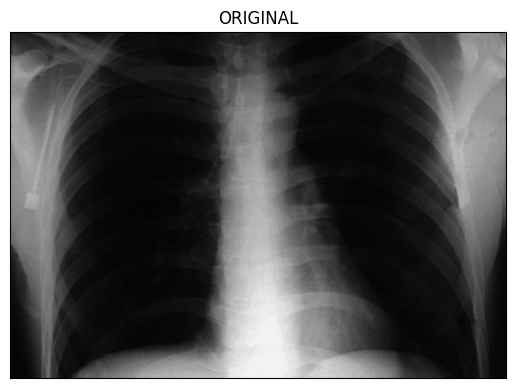

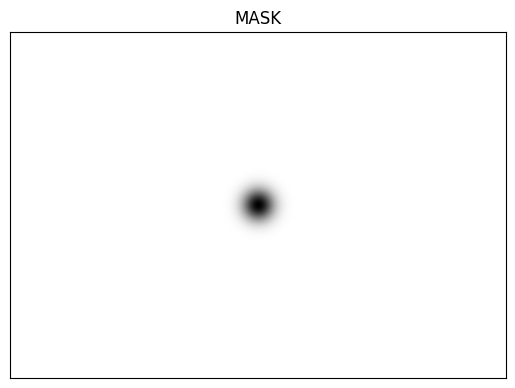

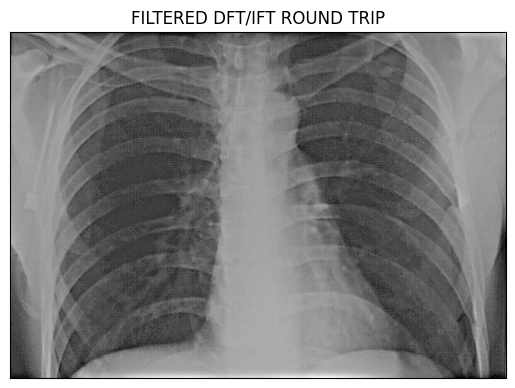

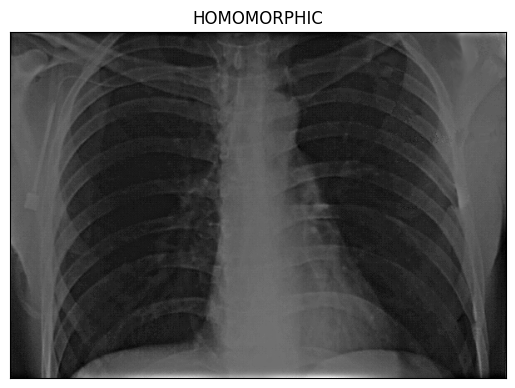

In [12]:
# read input and convert to grayscale
img = cv2.imread(CHEST_TIF, 0)
#img = cv2.imread(MOON_JPG, 0)
hh, ww = img.shape[:2]
row, col = img.shape


# take ln of image
img_log = np.log(np.float64(img), dtype=np.float64)

# do dft saving as complex output
dft = np.fft.fft2(img_log, axes=(0,1))

# apply shift of origin to center of image
dft_shift = np.fft.fftshift(dft)

# create black circle on white background for high pass filter
#radius = 3
# radius = 13
# mask = np.zeros_like(img, dtype=np.float64)
# cy = mask.shape[0] // 2
# cx = mask.shape[1] // 2
# cv2.circle(mask, (cx,cy), radius, 1, -1)
# mask = 1 - mask
# mask = cv2.GaussianBlur(mask, (47,47), 0)


# # Gaussian HPF
D0=13

H=[[math.exp(-((i-col/2)**2+(j-row/2)**2)/(2*D0**2)) for i in range(col)] for j in range(row)]
mask=np.ones(img.shape)
mask=mask-H

yh=.75
yl=.25
mask=(yh-yl)*mask+yl


# antialias mask via blurring
#mask = cv2.GaussianBlur(mask, (7,7), 0)

# apply mask to dft_shift
dft_shift_filtered = np.multiply(dft_shift,mask)

# shift origin from center to upper left corner
back_ishift = np.fft.ifftshift(dft_shift_filtered)

# do idft saving as complex
img_back = np.fft.ifft2(back_ishift, axes=(0,1))

# combine complex real and imaginary components to form (the magnitude for) the original image again
img_back = np.abs(img_back)

# apply exp to reverse the earlier log
img_homomorphic = np.exp(img_back, dtype=np.float64)

# scale result
img_homomorphic = cv2.normalize(img_homomorphic, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

## write result to disk
#cv2.imwrite("person_dft_numpy_mask.png", (255*mask).astype(np.uint8))
#cv2.imwrite("person_dft_numpy_homomorphic.png", img_homomorphic)

cv2_imshow("ORIGINAL", img)
cv2_imshow("MASK", mask)
cv2_imshow("FILTERED DFT/IFT ROUND TRIP", img_back)
cv2_imshow("HOMOMORPHIC", img_homomorphic)


## image1_band_reject

/tmp/ipykernel_11419/3598782900.py:56: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum1 = 20*np.log(cv2.magnitude(If[:,:,0],If[:,:,1]))


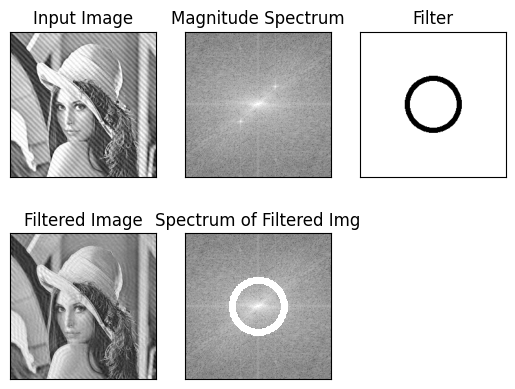

In [13]:
img = cv2.imread(LENA1_JPG, 0)

row, col = img.shape

I = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
I_shift = np.fft.fftshift(I)

magnitude_spectrum = 20*np.log(cv2.magnitude(I_shift[:,:,0],I_shift[:,:,1]))
#phase_spectrum = cv2.phase(dft_shift[:,:,0],dft_shift[:,:,1])
#H = np.ones((row, col),np.float32)
#H[70:95,125:150]=0
#H[125:150,70:95]=0

#Butterworth notch
#H = np.ones((row, col),np.float32)
# c1=[85, 138]
# c2=[138, 85]
# D0=15
# n=5
# H1=[[1/(1+(np.sqrt((i-c1[0])**2+(j-c1[1])**2)/D0)**(2*n)) for i in range(col)] for j in range(row)]
# H2=[[1/(1+(np.sqrt((i-c2[0])**2+(j-c2[1])**2)/D0)**(2*n)) for i in range(col)] for j in range(row)]

# H1=np.asarray(H1)
# H2=np.asarray(H2)
# H=H1+H2
# #H1i=1-H1
# #H2i=1-H2
# H=1-H
H = np.ones((row, col),np.float32)

d0=44
d1=36

for u in range(0, row):
        for v in range(0, col):
            # Get euclidean distance from point D(u,v) to the center
            D_uv = np.sqrt((u - row / 2 ) ** 2 + (v - col / 2 ) ** 2)
            # D_muv = np.sqrt((u - row / 2 - u_k) ** 2 + (v - col / 2 - v_k) ** 2)

            if D_uv <= d0 and D_uv >= d1:
                H[u, v] = 0.0







If=np.zeros((row,col,2))
If[:,:,0]=np.multiply(I_shift[:,:,0],H)
If[:,:,1]=np.multiply(I_shift[:,:,1],H)

#If[:,:,0]=np.multiply(If[:,:,0],H2i)
#If[:,:,1]=np.multiply(If[:,:,1],H2i)

magnitude_spectrum1 = 20*np.log(cv2.magnitude(If[:,:,0],If[:,:,1]))
f_ishift = np.fft.ifftshift(If)
img_back = cv2.idft(f_ishift)


plt.subplot(231),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(magnitude_spectrum, cmap = 'gray',vmin = 0, vmax = 255)
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(H, cmap = 'gray')
plt.title('Filter'), plt.xticks([]), plt.yticks([])
plt.subplot(234),plt.imshow(img_back[:,:,0], cmap = 'gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
plt.subplot(235),plt.imshow(magnitude_spectrum1, cmap = 'gray',vmin = 0, vmax = 255)
plt.title('Spectrum of Filtered Img'), plt.xticks([]), plt.yticks([])
#plt.subplot(236),plt.imshow(img-img_back[:,:,0], cmap = 'gray')
#plt.title('Filter'), plt.xticks([]), plt.yticks([])
plt.show()
#cv2.imshow('img', img)
#cv2.imshow('res',dst)

#cv2.waitKey(0)
#cv2.destroyAllWindows()


## image1_HPF

/tmp/ipykernel_11419/664344227.py:36: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum1 = 20*np.log(cv2.magnitude(If[:,:,0],If[:,:,1]))


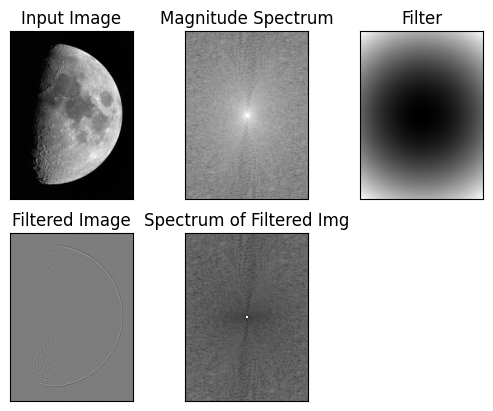

In [14]:

img=cv2.imread(MOON_JPG,0)
# create a mask
row, col = img.shape

I = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
I_shift = np.fft.fftshift(I)

magnitude_spectrum = 20*np.log(cv2.magnitude(I_shift[:,:,0],I_shift[:,:,1]))
#phase_spectrum = cv2.phase(dft_shift[:,:,0],dft_shift[:,:,1])
#H = np.zeros((row, col),np.float32)
D0=200

# #Ideal HPF
# H=[[(np.sqrt((i-col/2)**2+(j-row/2)**2)<D0) for i in range(col)] for j in range(row)]
# H_son=np.ones(img.shape)
# H_son=H_son-H

# Butterworth HPF
# n=5
# H=[[1/(1+(np.sqrt((i-col/2)**2+(j-row/2)**2)/D0)**(2*n)) for i in range(col)] for j in range(row)]
# H_son=np.ones(img.shape)
# H_son=H_son-H

#Gaussian HPF
H=[[math.exp(-((i-col/2)**2+(j-row/2)**2)/(2*D0**2)) for i in range(col)] for j in range(row)]
H_son=np.ones(img.shape)
H_son=H_son-H

If=np.zeros((row,col,2))
#If[:,:,0]=np.multiply(I_shift[:,:,0],H)
#If[:,:,1]=np.multiply(I_shift[:,:,1],H)

If[:,:,0]=I_shift[:,:,0]*H_son
If[:,:,1]=I_shift[:,:,1]*H_son

magnitude_spectrum1 = 20*np.log(cv2.magnitude(If[:,:,0],If[:,:,1]))
f_ishift = np.fft.ifftshift(If)
img_back = cv2.idft(f_ishift)


plt.subplot(231),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(magnitude_spectrum, cmap = 'gray',vmin = 0, vmax = 255)
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(H_son, cmap = 'gray')
plt.title('Filter'), plt.xticks([]), plt.yticks([])
plt.subplot(234),plt.imshow(img_back[:,:,0], cmap = 'gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
plt.subplot(235),plt.imshow(magnitude_spectrum1, cmap = 'gray',vmin = 0, vmax = 255)
plt.title('Spectrum of Filtered Img'), plt.xticks([]), plt.yticks([])
#plt.subplot(236),plt.imshow(img-img_back[:,:,0], cmap = 'gray')
#plt.title('Filter'), plt.xticks([]), plt.yticks([])
plt.show()
#cv2.imshow('img', img)
#cv2.imshow('res',dst)

#cv2.waitKey(0)
#cv2.destroyAllWindows()


## image1_LPF

/tmp/ipykernel_11419/673109347.py:36: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum1 = 20*np.log(cv2.magnitude(If[:,:,0],If[:,:,1]))


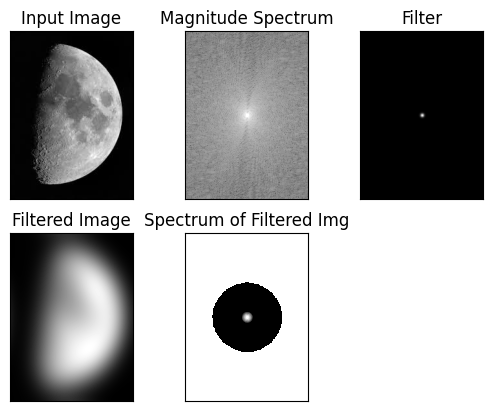

In [15]:
img=cv2.imread(MOON_JPG,0)
# create a mask
row, col = img.shape

I = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
I_shift = np.fft.fftshift(I)

magnitude_spectrum = 20*np.log(cv2.magnitude(I_shift[:,:,0],I_shift[:,:,1]))
#phase_spectrum = cv2.phase(dft_shift[:,:,0],dft_shift[:,:,1])
#H = np.zeros((row, col),np.float32)
D0=2

# Ideal LPF
# H=[[(np.sqrt((i-col/2)**2+(j-row/2)**2)<D0) for i in range(col)] for j in range(row)]


# # Butterworth LPF
# n=5
# H=[[1/(1+(np.sqrt((i-col/2)**2+(j-row/2)**2)/D0)**(2*n)) for i in range(col)] for j in range(row)]

# # H_son=np.ones(img.shape)

# # H_son=H_son-H

# Gaussian LPF
H=[[math.exp(-((i-col/2)**2+(j-row/2)**2)/(2*D0**2)) for i in range(col)] for j in range(row)]


If=np.zeros((row,col,2))
#If[:,:,0]=np.multiply(I_shift[:,:,0],H)
#If[:,:,1]=np.multiply(I_shift[:,:,1],H)

If[:,:,0]=I_shift[:,:,0]*H
If[:,:,1]=I_shift[:,:,1]*H

magnitude_spectrum1 = 20*np.log(cv2.magnitude(If[:,:,0],If[:,:,1]))
f_ishift = np.fft.ifftshift(If)
img_back = cv2.idft(f_ishift)


plt.subplot(231),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(magnitude_spectrum, cmap = 'gray',vmin = 0, vmax = 255)
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(H, cmap = 'gray')
plt.title('Filter'), plt.xticks([]), plt.yticks([])
plt.subplot(234),plt.imshow(img_back[:,:,0], cmap = 'gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
plt.subplot(235),plt.imshow(magnitude_spectrum1, cmap = 'gray',vmin = 0, vmax = 255)
plt.title('Spectrum of Filtered Img'), plt.xticks([]), plt.yticks([])
#plt.subplot(236),plt.imshow(img-img_back[:,:,0], cmap = 'gray')
#plt.title('Filter'), plt.xticks([]), plt.yticks([])
plt.show()
#cv2.imshow('img', img)
#cv2.imshow('res',dst)

#cv2.waitKey(0)
#cv2.destroyAllWindows()


## image1_MagPhaseSpectrum

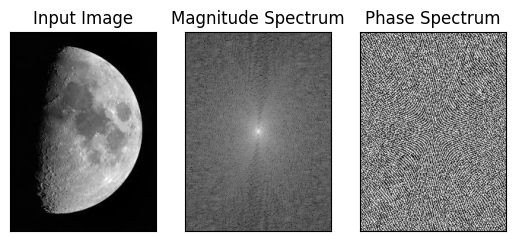

In [16]:
img = cv2.imread(MOON_JPG, 0)
# create a mask

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
phase_spectrum = cv2.phase(dft_shift[:,:,0],dft_shift[:,:,1])

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(phase_spectrum, cmap = 'gray')
plt.title('Phase Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()
#cv2.imshow('img', img)
#cv2.imshow('res',dst)

#cv2.waitKey(0)
#cv2.destroyAllWindows()


## image1_NotchFilter

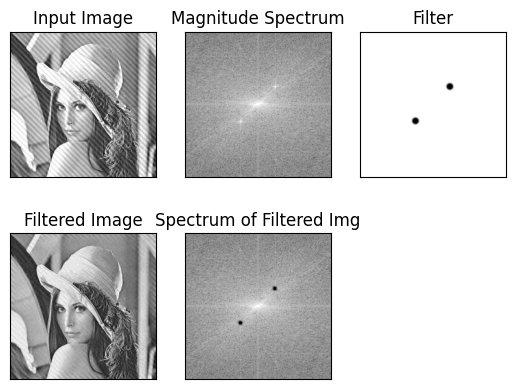

In [17]:
img = cv2.imread(LENA1_JPG, 0)

row, col = img.shape

I = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
I_shift = np.fft.fftshift(I)

magnitude_spectrum = 20*np.log(cv2.magnitude(I_shift[:,:,0],I_shift[:,:,1]))
#phase_spectrum = cv2.phase(dft_shift[:,:,0],dft_shift[:,:,1])
#H = np.ones((row, col),np.float32)
#H[70:95,125:150]=0
#H[125:150,70:95]=0

#Butterworth notch
#H = np.zeros((row, col),np.float32)
c1=[85, 138]
c2=[138, 85]
D0=5
n=5
H1=[[1/(1+(np.sqrt((i-c1[0])**2+(j-c1[1])**2)/D0)**(2*n)) for i in range(col)] for j in range(row)]
H2=[[1/(1+(np.sqrt((i-c2[0])**2+(j-c2[1])**2)/D0)**(2*n)) for i in range(col)] for j in range(row)]

H1=np.asarray(H1)
H2=np.asarray(H2)
H=H1+H2
#H1i=1-H1
#H2i=1-H2
H=1-H

If=np.zeros((row,col,2))
If[:,:,0]=np.multiply(I_shift[:,:,0],H)
If[:,:,1]=np.multiply(I_shift[:,:,1],H)

#If[:,:,0]=np.multiply(If[:,:,0],H2i)
#If[:,:,1]=np.multiply(If[:,:,1],H2i)

magnitude_spectrum1 = 20*np.log(cv2.magnitude(If[:,:,0],If[:,:,1]))
f_ishift = np.fft.ifftshift(If)
img_back = cv2.idft(f_ishift)


plt.subplot(231),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(magnitude_spectrum, cmap = 'gray',vmin = 0, vmax = 255)
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(H, cmap = 'gray')
plt.title('Filter'), plt.xticks([]), plt.yticks([])
plt.subplot(234),plt.imshow(img_back[:,:,0], cmap = 'gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
plt.subplot(235),plt.imshow(magnitude_spectrum1, cmap = 'gray',vmin = 0, vmax = 255)
plt.title('Spectrum of Filtered Img'), plt.xticks([]), plt.yticks([])
#plt.subplot(236),plt.imshow(img-img_back[:,:,0], cmap = 'gray')
#plt.title('Filter'), plt.xticks([]), plt.yticks([])
plt.show()
#cv2.imshow('img', img)
#cv2.imshow('res',dst)

#cv2.waitKey(0)
#cv2.destroyAllWindows()


## laplacian

/tmp/ipykernel_11419/4026051952.py:28: RuntimeWarning: divide by zero encountered in log
  filterMag = 20 * np.log(cv2.magnitude(filter[:, :, 0], filter[:, :, 1]))
/tmp/ipykernel_11419/4026051952.py:31: RuntimeWarning: divide by zero encountered in log
  fshift_mask_mag = 20 * np.log(cv2.magnitude(applied[:, :, 0], applied[:, :, 1]))


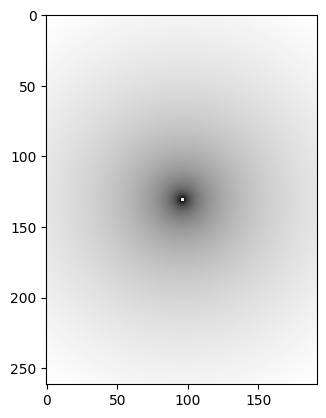

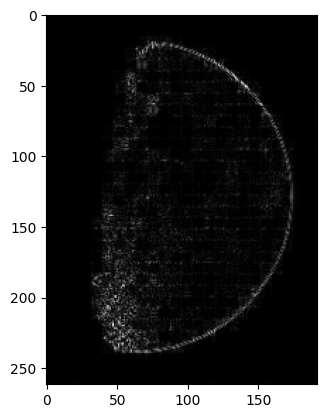

In [18]:
img = cv2.imread(MOON_JPG, 0)

m, n = img.shape

ft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
ft_shifted = dft_shift = np.fft.fftshift(ft)


def highLaplacian(M, N):
    # Initializing the filter with ones; since the filter is a complex function,
    # it has two channels, representing the real and imaginary parts;
    # the data type is float32, since the pixels will take floating point values:
    filter = np.zeros((M, N, 2), dtype=np.float32)
    
    # Scanning through each pixel and calculating the negative of the sum of the
    # squares of the pixels, and assigning the value to the corresponding pixel
    # in the filter:
    for i in range(M):
        for j in range(N):
            filter[i][j] = -((i-M/2)**2 + (j-N/2)**2)

    return filter



filter = highLaplacian(m, n)

filterMag = 20 * np.log(cv2.magnitude(filter[:, :, 0], filter[:, :, 1]))

applied = ft_shifted * filter
fshift_mask_mag = 20 * np.log(cv2.magnitude(applied[:, :, 0], applied[:, :, 1]))
f_ishift = np.fft.ifftshift(applied)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])



plt.imshow(filterMag,cmap="gray")
plt.show()


imgplot = plt.imshow(img_back, cmap="gray")
plt.show()







